In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

In [9]:
train.shape,test.shape,sample.shape

((381109, 12), (127037, 11), (127037, 2))

In [10]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<AxesSubplot:ylabel='Response'>

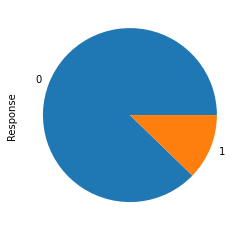

In [13]:
train["Response"].value_counts(normalize=True).plot(kind='pie')

In [14]:
sample["Response"]=0.5

In [16]:
sample.to_csv('benchmark_check.csv', index=False)

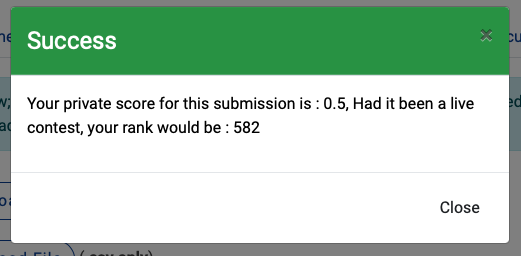

In [5]:
data=pd.concat([train,test],axis=0)

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
data.isna().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


In [9]:
data.duplicated().sum()

0

In [12]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("------------------")
    

id
1         1
338760    1
338773    1
338772    1
338771    1
         ..
169378    1
169377    1
169376    1
169375    1
508146    1
Name: id, Length: 508146, dtype: int64
------------------
Gender
Male      274325
Female    233821
Name: Gender, dtype: int64
------------------
Age
24    34565
23    32353
22    28058
25    27578
21    21910
      ...  
81       77
82       42
83       32
84       18
85       12
Name: Age, Length: 66, dtype: int64
------------------
Driving_License
1    507097
0      1049
Name: Driving_License, dtype: int64
------------------
Region_Code
28.0    141937
8.0      44900
46.0     26357
41.0     24400
15.0     17750
30.0     16276
29.0     14843
50.0     13657
3.0      12349
11.0     12328
36.0     11696
33.0     10307
47.0      9942
35.0      9309
6.0       8351
45.0      7543
37.0      7343
18.0      6903
48.0      6274
14.0      6249
39.0      6138
10.0      5847
21.0      5671
2.0       5398
13.0      5396
7.0       4313
12.0      4235
9.0       4084
32

In [13]:
data.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0


<AxesSubplot:xlabel='Gender', ylabel='Age'>

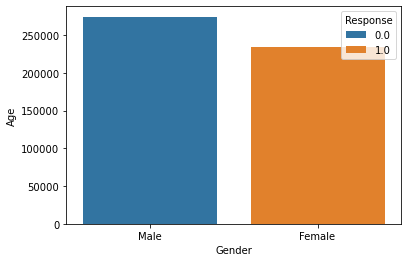

In [22]:
sns.countplot(data=data,x='Gender')


<AxesSubplot:xlabel='Gender', ylabel='Age'>

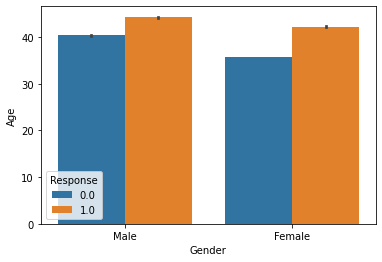

In [23]:
sns.barplot(data=data,x='Gender', y='Age', hue='Response')

In [32]:
data.columns
    
    


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

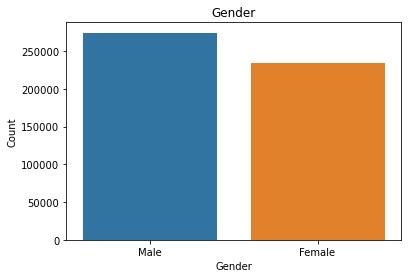

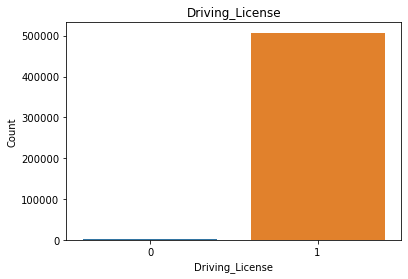

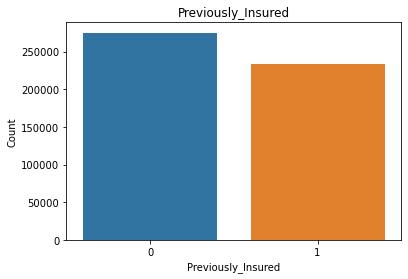

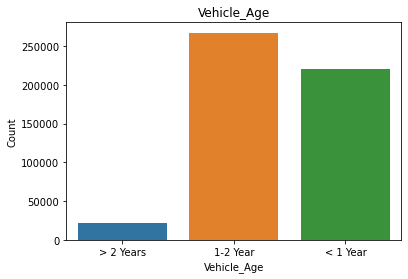

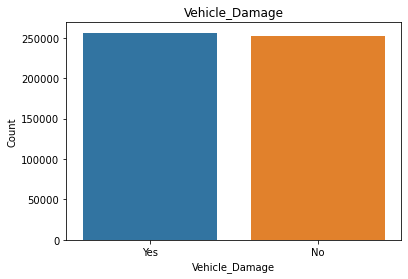

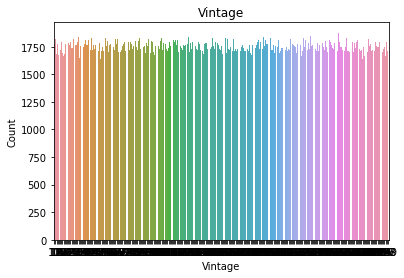

In [33]:
for i in ['Gender','Driving_License', 
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
       'Vintage']:
    sns.countplot(data = data, x = i)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [34]:
data.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0.0            771
                 1.0             41
1                0.0         333628
                 1.0          46669
Name: Response, dtype: int64

<AxesSubplot:xlabel='Gender'>

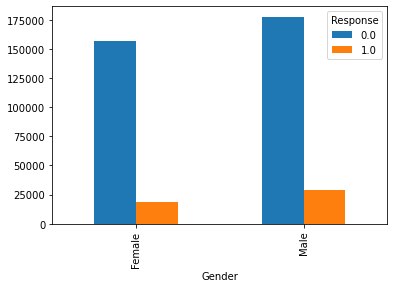

In [35]:
pd.crosstab(data.Gender, data.Response).plot(kind='bar')

<AxesSubplot:xlabel='Driving_License'>

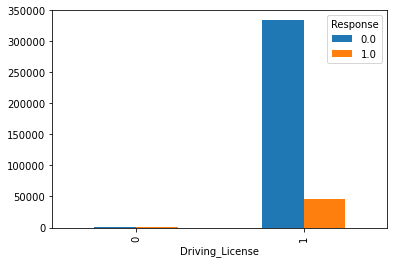

In [36]:
#Comparing how Driving_License influense the response
pd.crosstab(data.Driving_License, data.Response).plot(kind = 'bar')

<AxesSubplot:xlabel='Previously_Insured'>

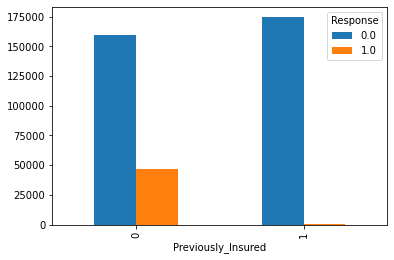

In [37]:
#Comparing how Previously_Insured influense the response
pd.crosstab(data.Previously_Insured, data.Response).plot(kind = 'bar')
# Contact those customer who have not insured so far

<AxesSubplot:xlabel='Vehicle_Age'>

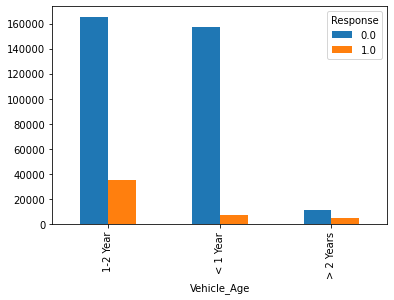

In [38]:
#Comparing how Vehicle_Age influense the response
pd.crosstab(data.Vehicle_Age, data.Response).plot(kind = 'bar')
# Contact those customer who have recently bought the vehicle

In [39]:
pd.crosstab(data.Vehicle_Age, data.Response,normalize=True)

Response,0.0,1.0
Vehicle_Age,,
1-2 Year,0.434285,0.091328
< 1 Year,0.413488,0.018897
> 2 Years,0.029663,0.012338


In [40]:
res = pd.crosstab(data.Vehicle_Age, data.Response)

<AxesSubplot:xlabel='Vehicle_Age'>

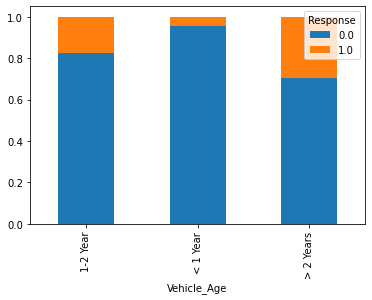

In [41]:
res.div(res.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
# The customer with vehicle age more than 2 years has 30% likely to get the insurance

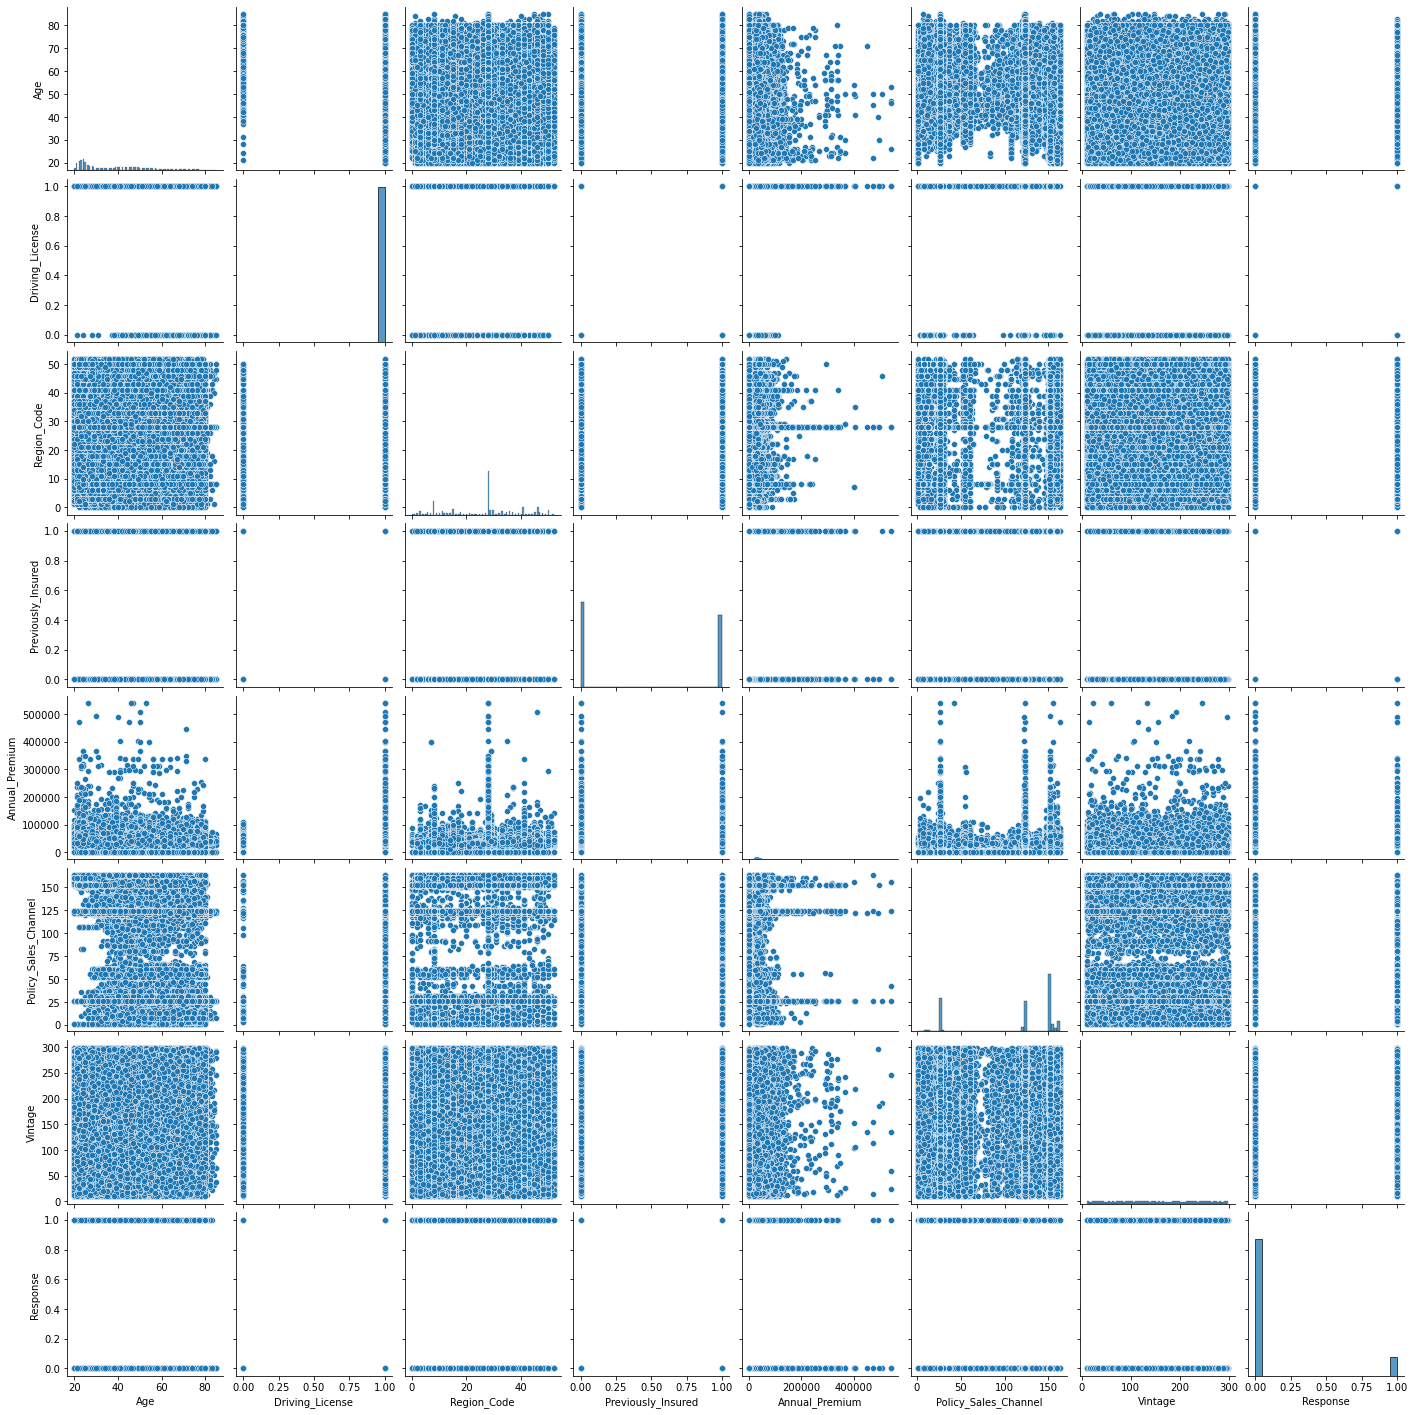

In [42]:
sns.pairplot(data.drop(columns = 'id').dropna())

<AxesSubplot:>

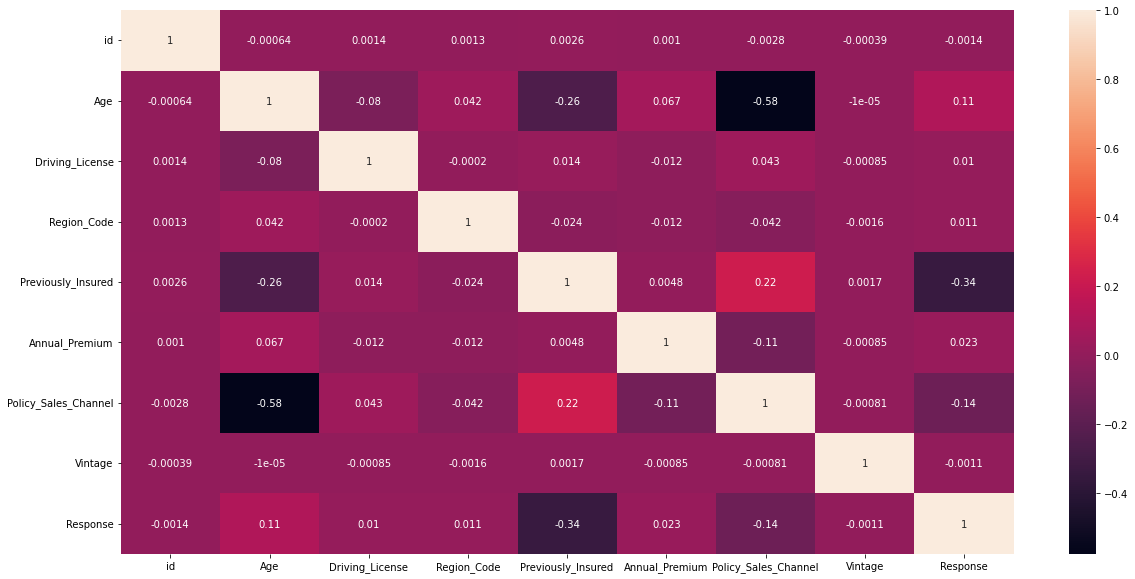

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)